<a href="https://colab.research.google.com/github/Himaaa-07/SOURCE-CODE-DATA-SET-4-/blob/main/DATASET_4(CARDIOVASCULA_DISEASE_DATASET).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB
Index(['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']

<Figure size 1000x600 with 0 Axes>

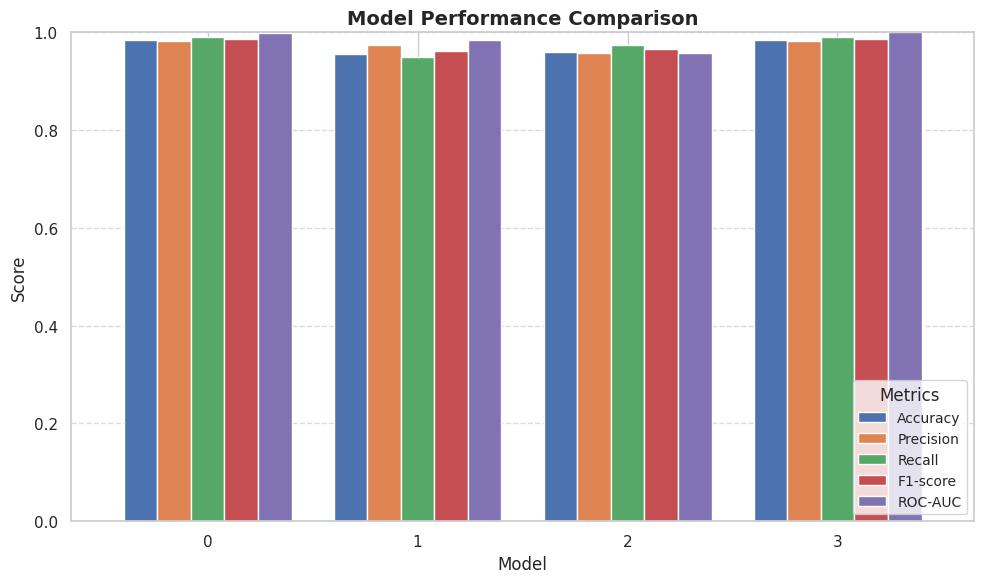

Best model based on accuracy: SVM


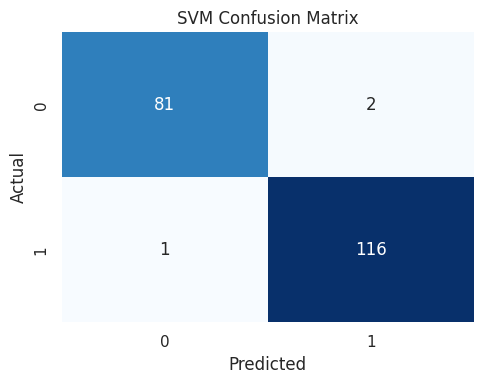

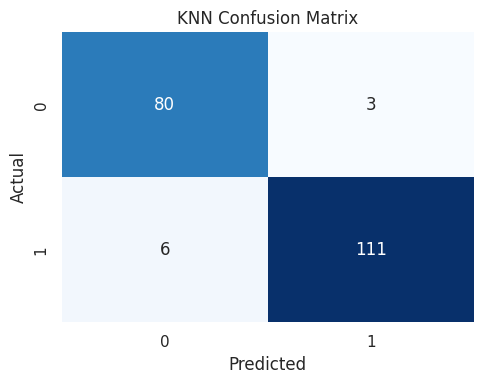

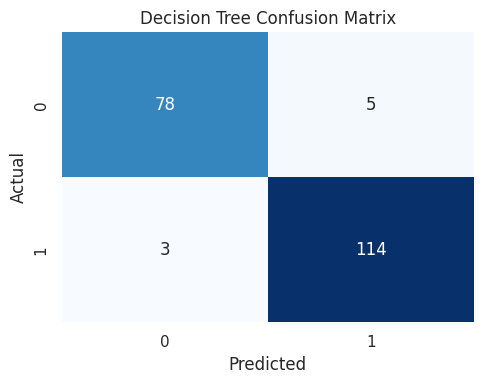

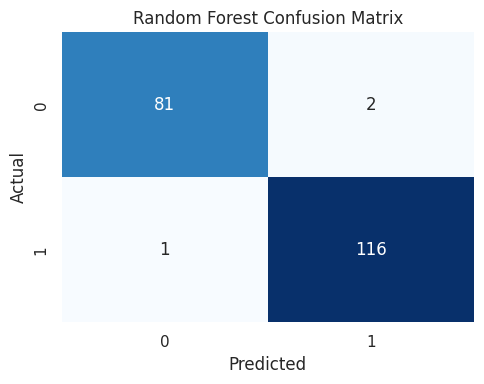

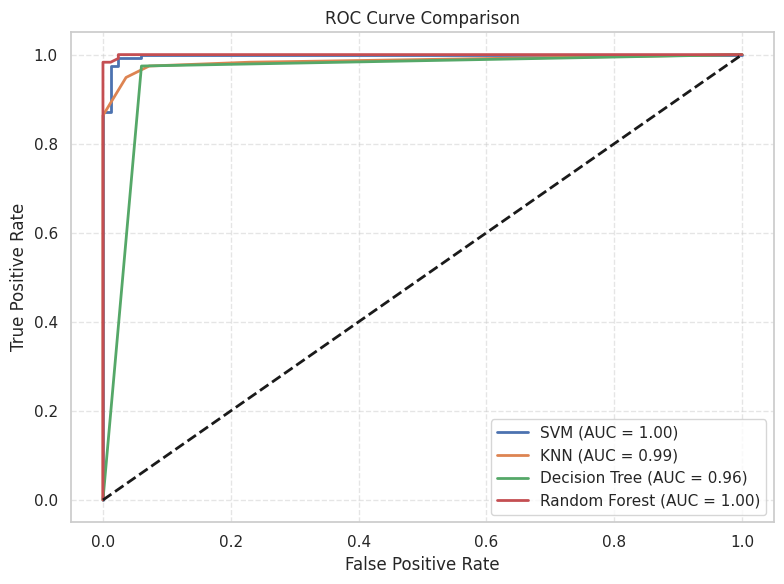

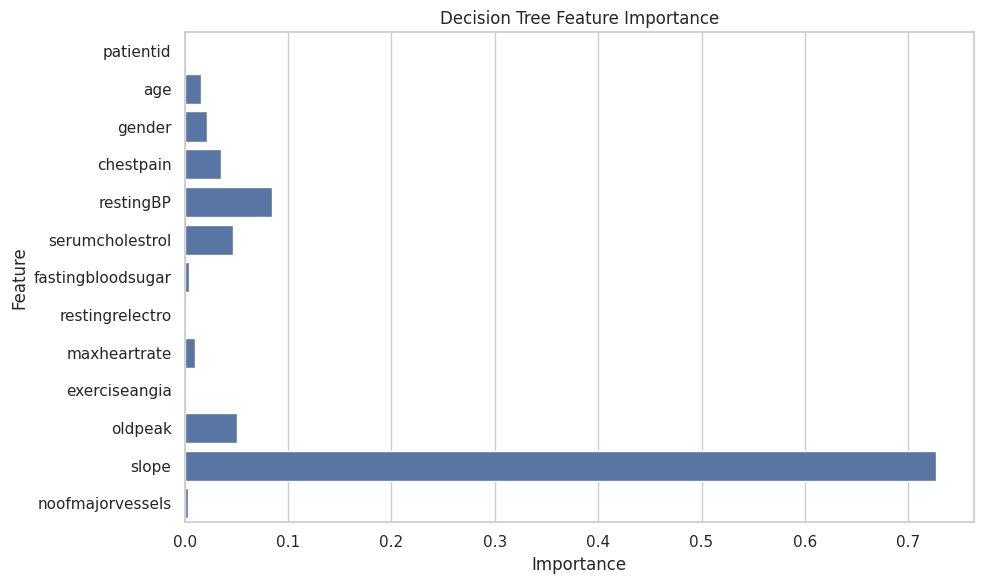

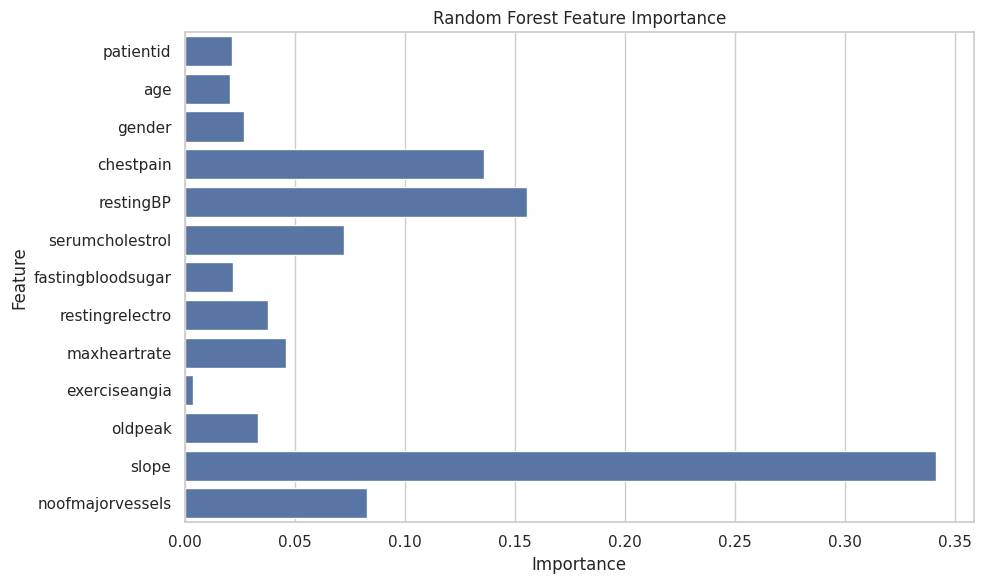

The person is predicted to HAVE cardiovascular disease.
Risk probability: 1.00


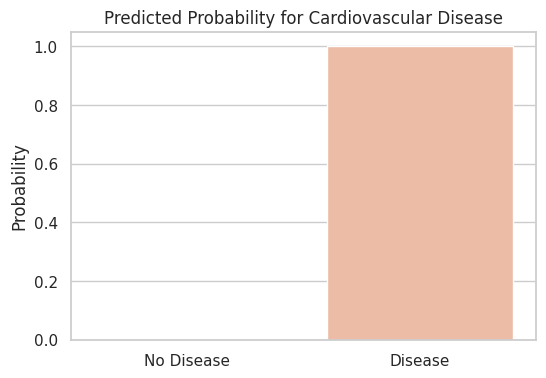

The person is predicted to NOT have cardiovascular disease.
Risk probability: 0.03


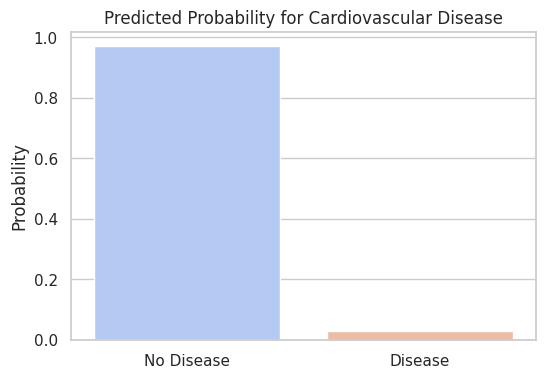

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://316b8ceb424c4ac800.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/Cardiovascular_Disease_Dataset .csv')
df.head()
df.shape
df.info()
df.describe()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

predictions = {}
for name, model in models.items():
    if name in ["SVM", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:,1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:,1]

    predictions[name] = {"y_pred": y_pred, "y_proba": y_proba}

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

metrics_list = []

for name, result in predictions.items():
    y_pred = result["y_pred"]
    y_proba = result["y_proba"]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    metrics_list.append({
        "Model": name,
        "Accuracy": round(accuracy, 3),
        "Precision": round(precision, 3),
        "Recall": round(recall, 3),
        "F1-score": round(f1, 3),
        "ROC-AUC": round(roc_auc, 3)
    })

metrics_df = pd.DataFrame(metrics_list)
metrics_df
print(metrics_df.columns)
print(metrics_df.head())
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

metrics_df[["Accuracy","Precision","Recall","F1-score","ROC-AUC"]].plot(
    kind="bar", figsize=(10,6), width=0.8
)

plt.title("Model Performance Comparison", fontsize=14, weight='bold')
plt.ylabel("Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title="Metrics", loc="lower right", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
if "Model" in metrics_df.columns:
    best_model_name = metrics_df.sort_values(by="Accuracy", ascending=False).iloc[0]["Model"]
else:
    best_model_name = metrics_df["Accuracy"].idxmax()
print(f"Best model based on accuracy: {best_model_name}")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

sns.set(style="whitegrid")

for name, result in predictions.items():
    y_pred = result["y_pred"]
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(8,6))
for name, result in predictions.items():
    y_proba = result["y_proba"]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


features = X.columns

dt_model = models["Decision Tree"]
dt_importances = dt_model.feature_importances_

plt.figure(figsize=(10,6))
sns.barplot(x=dt_importances, y=features)
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

rf_model = models["Random Forest"]
rf_importances = rf_model.feature_importances_

plt.figure(figsize=(10,6))
sns.barplot(x=rf_importances, y=features)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
import pandas as pd

patient1 = {
    "patientid": 1001,
    "age": 54,
    "gender": 1,
    "chestpain": 2,
    "restingBP": 140,
    "serumcholestrol": 220,
    "fastingbloodsugar": 0,
    "restingrelectro": 1,
    "maxheartrate": 160,
    "exerciseangia": 0,
    "oldpeak": 1.2,
    "slope": 2,
    "noofmajorvessels": 0
}

patient_df = pd.DataFrame([patient1])
patient_df = patient_df[X.columns]

patient_scaled = scaler.transform(patient_df)

best_model = models[best_model_name]
prediction = best_model.predict(patient_scaled)[0]
probability = best_model.predict_proba(patient_scaled)[0][1]

if prediction == 1:
    print("The person is predicted to HAVE cardiovascular disease.")
else:
    print("The person is predicted to NOT have cardiovascular disease.")

print(f"Risk probability: {probability:.2f}")
plt.figure(figsize=(6,4))
sns.barplot(x=["No Disease", "Disease"], y=[1-probability, probability], palette="coolwarm")
plt.title("Predicted Probability for Cardiovascular Disease")
plt.ylabel("Probability")
plt.show()
import pandas as pd

patient2 = {
    "patientid": 1002,
    "age": 35,
    "gender": 0,
    "chestpain": 0,
    "restingBP": 110,
    "serumcholestrol": 180,
    "fastingbloodsugar": 0,
    "restingrelectro": 1,
    "maxheartrate": 175,
    "exerciseangia": 0,
    "oldpeak": 0.0,
    "slope": 1,
    "noofmajorvessels": 0
}

healthy_df = pd.DataFrame([patient2])
healthy_df = healthy_df[X.columns]

healthy_scaled = scaler.transform(healthy_df)

best_model = models[best_model_name]
prediction = best_model.predict(healthy_scaled)[0]
probability = best_model.predict_proba(healthy_scaled)[0][1]

if prediction == 1:
    print("The person is predicted to HAVE cardiovascular disease.")
else:
    print("The person is predicted to NOT have cardiovascular disease.")

print(f"Risk probability: {probability:.2f}")
plt.figure(figsize=(6,4))
sns.barplot(x=["No Disease", "Disease"], y=[1-probability, probability], palette="coolwarm")
plt.title("Predicted Probability for Cardiovascular Disease")
plt.ylabel("Probability")
plt.show()

import gradio as gr
import numpy as np

X = df.drop(['patientid','target'], axis=1)
y = df['target']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.svm import SVC
best_model = SVC(probability=True, random_state=42)
best_model.fit(X_scaled, y)

features = X.columns.tolist()

def predict_cvd(*inputs):
    input_array = np.array([inputs])
    scaled_input = scaler.transform(input_array)

    pred = best_model.predict(scaled_input)[0]
    prob = best_model.predict_proba(scaled_input)[0][1]

    if pred == 1:
        return f" Predicted to HAVE cardiovascular disease.\nRisk probability: {prob:.3f}"
    else:
        return f" Predicted to NOT have cardiovascular disease.\nRisk probability: {prob:.3f}"

interface = gr.Interface(
    fn=predict_cvd,
    inputs=[
        gr.Number(label="Age", value=55),
        gr.Radio([1, 2], label="Gender (1=Male, 2=Female)", value=1),
        gr.Slider(0, 3, step=1, label="Chest Pain Type", value=2),
        gr.Number(label="Resting BP", value=140),
        gr.Number(label="Serum Cholesterol", value=220),
        gr.Radio([0,1], label="Fasting Blood Sugar >120 mg/dl", value=0),
        gr.Slider(0, 2, step=1, label="Resting Electrocardiographic Result", value=1),
        gr.Number(label="Maximum Heart Rate Achieved", value=160),
        gr.Radio([0,1], label="Exercise Induced Angina", value=0),
        gr.Number(label="Oldpeak (ST depression)", value=1.2),
        gr.Slider(1,3, step=1, label="Slope of ST segment", value=2),
        gr.Slider(0,3, step=1, label="Number of Major Vessels", value=0)
    ],
    outputs="text",
    title=" Cardiovascular Disease Prediction",
    description="Enter patient data to predict cardiovascular disease risk.",
    theme="soft"
)

interface.launch()
